### Multiple Linear Regression

1. Import the libraries:
2. Load the dataset and extract independent and dependent variables: 
3. Finding the correlation in dataset. 
4. Encoding the categorical data:
5. Avoid dummy variable trap.
6. Splint the data into train and test set.
7. Fitting multiple linear regression models to training set. 
8. Predict Test set result.
9. Calculating the coefficients and intercepts.
10. Evaluating the model.


#### 1. Import the libraries:

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### 2. Load the dataset and extract independent and dependent variables: 

In [6]:
# Importing the dataset
df = pd.read_csv('../Data/50_Companies.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

#### 3. Finding the correlation in dataset. 

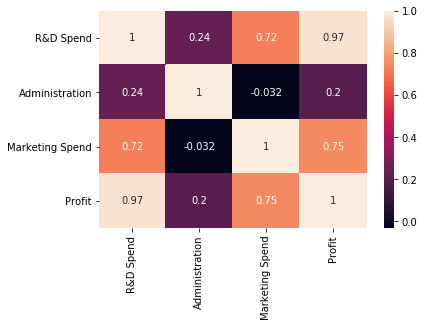

In [42]:
sns.heatmap(df.corr(), annot=True)

#### 4. Encoding the categorical data:

In [19]:
labelencoder = LabelEncoder() # Encode labels with value between 0 and n_classes-1.
X[:, 3] = labelencoder.fit_transform(X[:, 3]) # Fit label encoder and return encoded labels
onehotencoder = OneHotEncoder(categorical_features = [3]) # Encode categorical integer features as a one-hot numeric array.
X = onehotencoder.fit_transform(X).toarray() # Fit OneHotEncoder to X, then transform X.
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0114555e+05, 4.0793454e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1698380e+05, 4.5173060e+04]])

#### 5. Avoid dummy variable trap.

In [20]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.3689780e+05, 4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0114555e+05, 4.0793454e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1698380e+05, 4.5173060e+04]])

#### 6. Split the data into train and test set.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#### 7. Fitting multiple linear regression models to training set. 

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 8. Predict Test set result.

In [46]:
y_pred = regressor.predict(X_test)

#### 9. Calculating the coefficients and intercepts.

In [52]:
# Calculating the Intercept
print("Intercept", regressor.intercept_)

# Calculating the Coefficients
print("Coefficients", regressor.coef_)

Intercept -230977.26514803528
Coefficients [ 1.78640822e-06  1.65325915e+04 -2.96803046e-06  5.07680421e+03
 -3.91248250e-06 -2.74686245e+04  7.39977200e+04  6.39948391e+04
 -2.56530391e+04  5.73480065e-07  1.04938834e+05  1.77069317e+05
  1.85056615e-06 -5.23705231e+04  2.91262395e+04 -2.58289219e-07
  3.87151876e+04  5.57704698e+04  1.79456082e+04 -4.66116035e-12
 -1.11710082e+05  1.04460421e+04 -1.09139364e-11 -2.47383553e+04
 -2.95131291e+04  4.09874087e+04  7.64023851e+04  4.20462029e+04
 -8.35665613e+04  1.07757349e+04  1.02822988e+04  2.22134455e+04
  1.12701241e+04 -4.58025317e+04  1.28426804e+05  5.80186944e+04
  1.35143556e+04 -6.33831107e+04 -3.48891259e+04  8.18704805e+04
 -3.46680605e+04  6.26334843e+04  5.27776496e+04  8.24022911e+04
  0.00000000e+00  0.00000000e+00 -7.50788205e+03 -1.30044398e+04
 -2.22626373e+04  1.45899403e+04  7.67269693e+03  2.18420114e+00
  2.74613977e-01]


In [53]:
# y_test, y_pred

#### 10. Evaluating the model.

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [50]:
r2_score(y_test, y_pred)

-1.5209600867384814

In [54]:
metrics.mean_absolute_error(y_test, y_pred)

NameError: name 'metrics' is not defined